# Week 4: Basics of Bluesky

## RunEngine

In [1]:
from bluesky.run_engine import RunEngine

In [2]:
RE = RunEngine()

In [3]:
info = dir(RE)

In [4]:
print(info)

['NO_PLAN_RETURN', 'RunBundler', '_RE_class', '_RunEngine__interrupter_helper', '_UNCACHEABLE_COMMANDS', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abort_coro', '_add_status_to_group', '_blocking_event', '_call_returns_result', '_checkpoint', '_clear_call_cache', '_clear_checkpoint', '_clear_run_cache', '_close_run', '_collect', '_command_registry', '_complete', '_configure', '_create', '_create_result', '_declare_stream', '_deferred_pause_requested', '_drop', '_during_task', '_exception', '_exit_status', '_groups', '_halt_coro', '_input', '_install_suspender', '_interrupted', '_kickoff', '_locate', '_loop', '_loop_for_kwargs', '_metadata_per_call', '_monitor',

## Subscriptions

In [5]:
from databroker import Broker
db = Broker.named("temp")

Tiled version 0.1.0a120
INFO:tiled.server.app:Tiled version 0.1.0a120


## Note:

The above approach is good for quick demos like this one. After restarting the kernel or your IPython session, the previous entries collected into the temp catalog will be deleted.

For testing/development, use a script like [this](https://github.com/NSLS2/tst-profile-collection/blob/main/tiled-serve.sh) for more permanent storage.

In [6]:
RE.subscribe(db.insert)

0

In [7]:
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

In [8]:
RE.subscribe(bec)

1

In [9]:
# bec.disable_plots()
bec.enable_plots()
# bec.disable_table()
bec.enable_table()

## Plans

In [10]:
from bluesky.plans import count, scan

In [11]:
from ophyd.sim import det, noisy_det, motor1, motor2, motor

In [12]:
from ophyd import Kind
det.val.kind = Kind.hinted



Transient Scan ID: 1     Time: 2025-05-08 22:54:57
Persistent Unique Scan ID: '379efdba-89e8-403b-9c07-91bcb52b5267'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |      motor |        det |  noisy_det |
+-----------+------------+------------+------------+------------+
|         1 | 22:54:57.2 |     -1.000 |      0.607 |      0.635 |
|         2 | 22:54:57.4 |     -0.800 |      0.726 |      0.814 |
|         3 | 22:54:57.6 |     -0.600 |      0.835 |      0.802 |
|         4 | 22:54:57.8 |     -0.400 |      0.923 |      0.952 |
|         5 | 22:54:58.0 |     -0.200 |      0.980 |      0.954 |
|         6 | 22:54:58.2 |      0.000 |      1.000 |      0.958 |
|         7 | 22:54:58.4 |      0.200 |      0.980 |      1.055 |
|         8 | 22:54:58.6 |      0.400 |      0.923 |      0.862 |
|         9 | 22:54:58.8 |      0.600 |      0.835 |      0.858 |
|        10 | 22:54:59.0 |      0.800 |      0.726 |      0.694 |
|

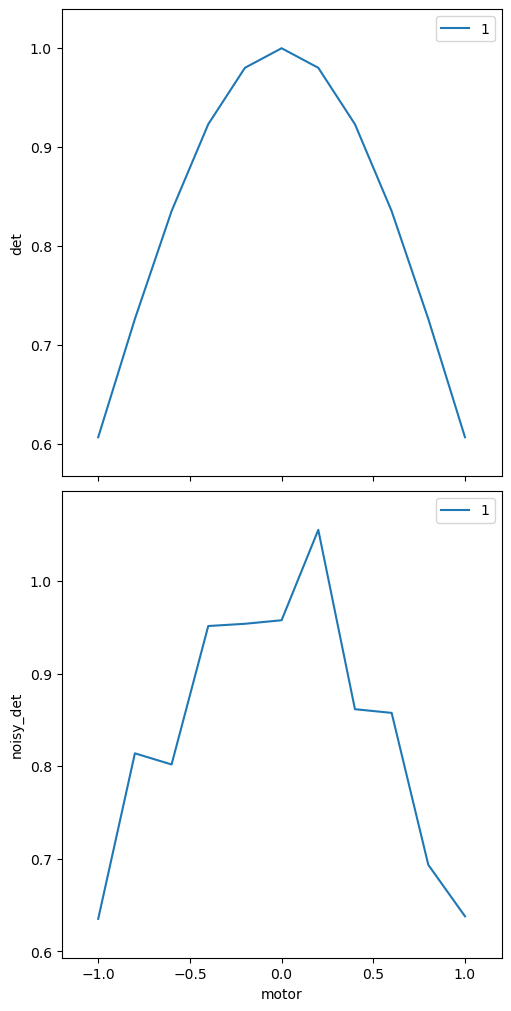

In [13]:
uid, = RE(scan([det, noisy_det], motor, -1, 1, 11))

In [14]:
db[uid].table()

,det,motor,motor_setpoint,noisy_det,time
seq_num,,,,,
1,0.606531,-1.0,-1.0,0.635264,2025-05-09 02:54:57.248604298
2,0.726149,-0.8,-0.8,0.814027,2025-05-09 02:54:57.487265110
3,0.835270,-0.6,-0.6,0.801996,2025-05-09 02:54:57.687141180
4,0.923116,-0.4,-0.4,0.951552,2025-05-09 02:54:57.882127523
5,0.980199,-0.2,-0.2,0.953968,2025-05-09 02:54:58.089540005
6,1.000000,0.0,0.0,0.957792,2025-05-09 02:54:58.286149263
7,0.980199,0.2,0.2,1.055431,2025-05-09 02:54:58.475185871
8,0.923116,0.4,0.4,0.861704,2025-05-09 02:54:58.664490461
9,0.835270,0.6,0.6,0.857719,2025-05-09 02:54:58.854966164


In [15]:
from pprint import pformat
for name, doc in db[uid].documents():
    print(f"{name = }\n{pformat(doc)}\n===========\n")

name = 'start'
{'detectors': ['det', 'noisy_det'],
 'hints': {'dimensions': [[['motor'], 'primary']]},
 'motors': ['motor'],
 'num_intervals': 10,
 'num_points': 11,
 'plan_args': {'args': ["SynAxis(prefix='', name='motor', "
                        "read_attrs=['readback', 'setpoint'], "
                        "configuration_attrs=['velocity', 'acceleration'])",
                        -1,
                        1],
               'detectors': ["SynGauss(prefix='', name='det', "
                             "read_attrs=['val'], configuration_attrs=['Imax', "
                             "'center', 'sigma', 'noise', 'noise_multiplier'])",
                             "SynGauss(prefix='', name='noisy_det', "
                             "read_attrs=['val'], configuration_attrs=['Imax', "
                             "'center', 'sigma', 'noise', "
                             "'noise_multiplier'])"],
               'num': 11,
               'per_step': 'None'},
 'plan_name': 'scan',
 '

In [16]:
db[uid].table().iloc[8].time.isoformat()

'2025-05-09T02:54:58.854966164'

In [17]:
db[uid]

## Metadata

In [18]:
RE.md.update({"beamline": "TST", "proposal": 123})
RE.md

{'versions': {'ophyd': '1.9.0', 'bluesky': '1.13.0a3'},
 'scan_id': 1,
 'beamline': 'TST',
 'proposal': 123}

In [19]:
uid, = RE(  count([noisy_det], ), mood="optimistic")



Transient Scan ID: 2     Time: 2025-05-08 22:55:00
Persistent Unique Scan ID: '302feda9-bdc7-4dd3-ba5f-1e99de780274'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |  noisy_det |
+-----------+------------+------------+
|         1 | 22:55:00.5 |      0.696 |
+-----------+------------+------------+
generator count ['302feda9'] (scan num: 2)





In [20]:
def top_level(md={"sample": {"formula": "C2H6"}}):
    uid1 = (yield from count([noisy_det], md=md))
    uid2 = (yield from count([det], md={"test": "yes"}))
    return (uid1, uid2)

In [21]:
uids = RE(top_level())



Transient Scan ID: 3     Time: 2025-05-08 22:55:00
Persistent Unique Scan ID: '0fa6dbe5-1b23-4bb4-bafb-63718cc1108c'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |  noisy_det |
+-----------+------------+------------+
|         1 | 22:55:00.6 |      0.613 |
+-----------+------------+------------+
generator count ['0fa6dbe5'] (scan num: 3)





Transient Scan ID: 4     Time: 2025-05-08 22:55:00
Persistent Unique Scan ID: 'f7978a87-7bb8-4580-9943-7d438219ee5f'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |        det |
+-----------+------------+------------+
|         1 | 22:55:00.8 |      0.607 |
+-----------+------------+------------+
generator count ['f7978a87'] (scan num: 4)





In [22]:
uids

('0fa6dbe5-1b23-4bb4-bafb-63718cc1108c',
 'f7978a87-7bb8-4580-9943-7d438219ee5f')

In [23]:
db[uids[0]].start

{'uid': '0fa6dbe5-1b23-4bb4-bafb-63718cc1108c',
 'time': 1746759300.643274,
 'versions': {'ophyd': '1.9.0', 'bluesky': '1.13.0a3'},
 'scan_id': 3,
 'beamline': 'TST',
 'proposal': 123,
 'plan_type': 'generator',
 'plan_name': 'count',
 'detectors': ['noisy_det'],
 'num_points': 1,
 'num_intervals': 0,
 'plan_args': {'detectors': ["SynGauss(prefix='', name='noisy_det', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])"],
  'num': 1,
  'delay': None},
 'hints': {'dimensions': [[['time'], 'primary']]},
 'sample': {'formula': 'C2H6'}}

In [24]:
db[uids[1]].start

{'uid': 'f7978a87-7bb8-4580-9943-7d438219ee5f',
 'time': 1746759300.7855368,
 'versions': {'ophyd': '1.9.0', 'bluesky': '1.13.0a3'},
 'scan_id': 4,
 'beamline': 'TST',
 'proposal': 123,
 'plan_type': 'generator',
 'plan_name': 'count',
 'detectors': ['det'],
 'num_points': 1,
 'num_intervals': 0,
 'plan_args': {'detectors': ["SynGauss(prefix='', name='det', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])"],
  'num': 1,
  'delay': None},
 'hints': {'dimensions': [[['time'], 'primary']]},
 'test': 'yes'}

## Plan Simulators

In [25]:
def top_level(md={"sample": {"formula": "C2H6"}}):
    yield from count([noisy_det], md=md)
    yield from count([det], md={"test": "yes"})

In [26]:
plan = top_level()

In [27]:
from bluesky.simulators import summarize_plan

In [28]:
summarize_plan(scan([det], motor, -1, 1, 11))

=================================== Open Run ===================================
motor -> -1.0
  Read ['det', 'motor']
motor -> -0.8
  Read ['det', 'motor']
motor -> -0.6
  Read ['det', 'motor']
motor -> -0.3999999999999999
  Read ['det', 'motor']
motor -> -0.19999999999999996
  Read ['det', 'motor']
motor -> 0.0
  Read ['det', 'motor']
motor -> 0.20000000000000018
  Read ['det', 'motor']
motor -> 0.40000000000000013
  Read ['det', 'motor']
motor -> 0.6000000000000001
  Read ['det', 'motor']
motor -> 0.8
  Read ['det', 'motor']
motor -> 1.0
  Read ['det', 'motor']
================================== Close Run ===================================


In [29]:
from bluesky.simulators import plot_raster_path

In [30]:
from bluesky.plans import grid_scan

In [31]:
summarize_plan(grid_scan([det], motor1, -1, 1, 11, motor2, 0, 5, 7))

=================================== Open Run ===================================
motor1 -> -1.0
motor2 -> 0.0
  Read ['det', 'motor1', 'motor2']
motor2 -> 0.8333333333333334
  Read ['det', 'motor1', 'motor2']
motor2 -> 1.6666666666666667
  Read ['det', 'motor1', 'motor2']
motor2 -> 2.5
  Read ['det', 'motor1', 'motor2']
motor2 -> 3.3333333333333335
  Read ['det', 'motor1', 'motor2']
motor2 -> 4.166666666666667
  Read ['det', 'motor1', 'motor2']
motor2 -> 5.0
  Read ['det', 'motor1', 'motor2']
motor1 -> -0.8
motor2 -> 0.0
  Read ['det', 'motor1', 'motor2']
motor2 -> 0.8333333333333334
  Read ['det', 'motor1', 'motor2']
motor2 -> 1.6666666666666667
  Read ['det', 'motor1', 'motor2']
motor2 -> 2.5
  Read ['det', 'motor1', 'motor2']
motor2 -> 3.3333333333333335
  Read ['det', 'motor1', 'motor2']
motor2 -> 4.166666666666667
  Read ['det', 'motor1', 'motor2']
motor2 -> 5.0
  Read ['det', 'motor1', 'motor2']
motor1 -> -0.6
motor2 -> 0.0
  Read ['det', 'motor1', 'motor2']
motor2 -> 0.833333333

{'path': <matplotlib.lines.Line2D at 0x14a4abef6590>,
 'events': <matplotlib.collections.PathCollection at 0x14a4abefab10>}

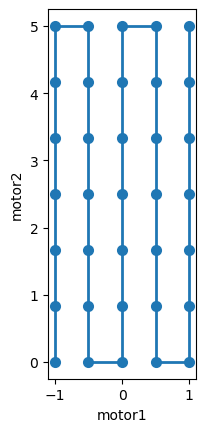

In [32]:
plot_raster_path(grid_scan([det], motor1, -1, 1, 5, motor2, 0, 5, 7, True), motor1.name, motor2.name)